In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [6]:
df1 = pd.read_csv('D:/DataScience/Linear_Regression/Bengaluru_House_Data.csv')

#Load bangalore home price into dataframe

In [7]:
df1.head

<bound method NDFrame.head of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df1.shape

(13320, 9)

In [10]:
df1.value_counts()

area_type             availability   location              size   society  total_sqft  bath  balcony  price 
Super built-up  Area  Ready To Move  Haralur Road          2 BHK  RInceeg  1243        2.0   2.0      46.00     10
                                     HSR Layout            2 BHK  NRosete  1140        2.0   2.0      46.00      9
                                     Parappana Agrahara    2 BHK  Peide L  1194        2.0   2.0      47.00      7
                      21-Dec         Kanakpura Road        3 BHK  PrarePa  1100        3.0   2.0      53.00      5
                      18-Sep         Chandapura            1 BHK  SunceEs  645         1.0   1.0      16.45      5
                                                                                                                ..
                      Ready To Move  Yeshwanthpur          3 BHK  IBityin  2559        3.0   2.0      141.00     1
                                                                  RNvasth  1852       

In [11]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
df1.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [15]:
df1.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [16]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
##Drop features that are not required 
df2=df1.drop(columns=['area_type','society','balcony','availability'])

In [17]:
df2.shape

(13320, 5)

In [18]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [19]:
##Drop columns having NUll values
df2.dropna()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [20]:
df2.shape

(13320, 5)

In [21]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [87]:
df3=df2.dropna()

In [88]:
df3.shape

(13246, 5)

In [89]:
df3.duplicated().sum()

np.int64(881)

###Feature Engineering-

In [90]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ronit\AppData\Local\Temp\ipykernel_20180\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [91]:
df3.shape

(13246, 6)

In [92]:
df3.info

<bound method DataFrame.info of                        location       size total_sqft  bath   price  bhk
0      Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2                   Uttarahalli      3 BHK       1440   2.0   62.00    3
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                      Kothanur      2 BHK       1200   2.0   51.00    2
...                         ...        ...        ...   ...     ...  ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00    5
13316             Richards Town      4 BHK       3600   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00    2
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00    4
13319              Doddathoguru      1 BHK        550   1.0   17.00    1

[13246 rows x 6 columns]>

Explore total sqft feature

In [133]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [134]:
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion.

In [150]:
def convert_sqft_to_num(x):
    values=x.split('-')
    if len(values)==2:
        return (float(values[0])+float(values[1]))/2
    try:
        return float(x)
    except:
        return None

In [151]:
df3[~df3['total_sqft'].apply(is_float)].total_sqft

30       2100 - 2850
122      3067 - 8156
137      1042 - 1105
165      1145 - 1340
188      1015 - 1540
            ...     
12975     850 - 1060
12990    1804 - 2273
13059    1200 - 1470
13265    1133 - 1384
13299    2830 - 2882
Name: total_sqft, Length: 190, dtype: object

In [152]:
df4=df3.copy()

In [153]:
df4.total_sqft=df4.total_sqft.apply(convert_sqft_to_num)

In [155]:
df4.total_sqft.isnull().sum()

np.int64(46)

In [157]:
df4=df4[df4.total_sqft.notnull()]

In [158]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [159]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [161]:
df4.total_sqft.isnull().sum()

np.int64(0)

In [164]:
## Add a newfeature called price persqft

In [165]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [166]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [189]:
df5.to_csv("bhp.csv",index=False)
df5.location = df5.location.apply(lambda x: x.strip())

In [190]:
df_loc=df5.location.value_counts()

In [286]:
df_loc

location
other                    2757
Whitefield                532
Sarjapur  Road            392
Electronic City           302
Kanakpura Road            264
                         ... 
1st Block Koramangala      10
Thyagaraja Nagar           10
Gunjur Palya               10
Dodsworth Layout           10
Nagadevanahalli            10
Name: count, Length: 254, dtype: int64

In [284]:
len(df_loc)

254

In [171]:
len(df_loc[df_loc>10])

240

In [195]:
df_loc_lessthan10=df_loc[df_loc<=10]

In [197]:
##Mark location with counts of houses less than 10 as 'other'
df5.location=df5.location.apply(lambda x : 'other'  if x in df_loc_lessthan10 else x ) 

In [199]:
len(df5.location.unique())

241

##Outlier Removal Using Business Logic
###As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [200]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [201]:
df5.shape

(13200, 7)

In [204]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [205]:
df6.shape

(12456, 7)

Outlier Removal Using Standard Deviation and Mean

In [206]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation


In [207]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10245, 7)

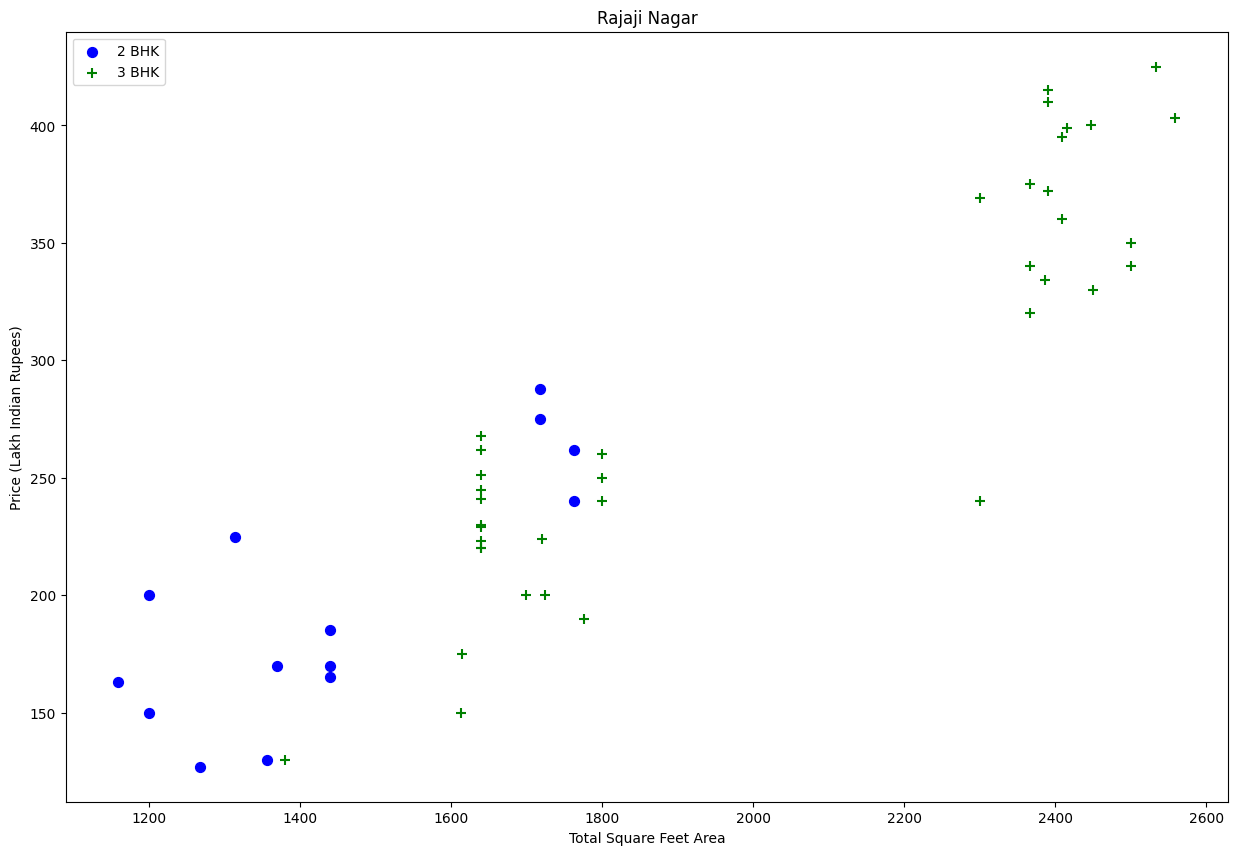

In [208]:
## removing outlier from data analysis in scatter plot

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()


    ## plot before outlier removal
plot_scatter_chart(df7,"Rajaji Nagar")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [209]:
df7.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10245.000000,10245.000000,10245.000000,10245.000000,10245.000000
mean,1503.808170,2.474085,90.977270,2.572279,5657.835532
std,876.776542,0.981992,86.139369,0.897398,2266.165749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.762955
50%,1282.000000,2.000000,67.000000,2.000000,5173.279759
75%,1650.000000,3.000000,100.000000,3.000000,6426.099852
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [223]:
def remove_bhk_outlier(df):
    exclude_index=np.array([])
    for i , j in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in j.groupby('bhk'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in j.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_index=np.append(exclude_index, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_index,axis='index')          

In [224]:
df8=remove_bhk_outlier(df7)

In [225]:
df8.shape


(7331, 7)

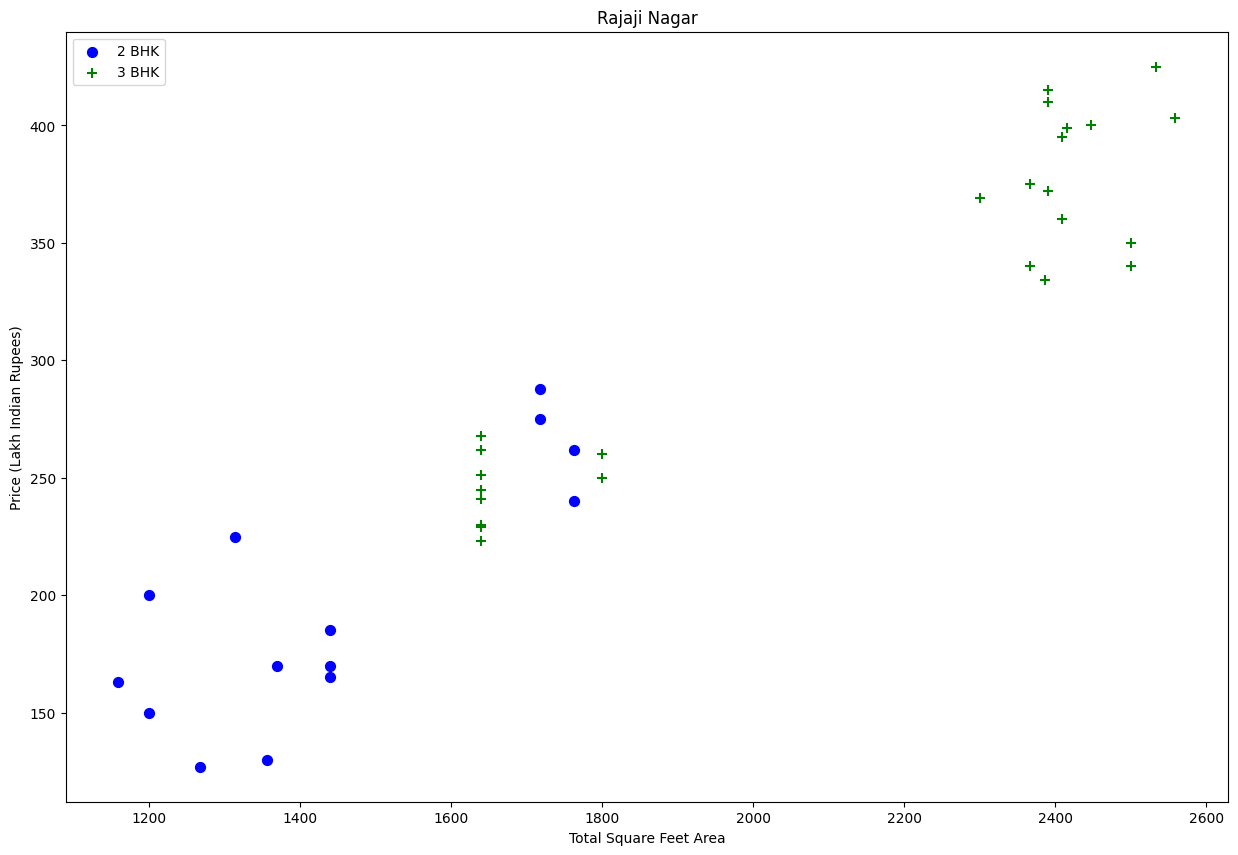

In [226]:
plot_scatter_chart(df8,"Rajaji Nagar")
## plot after removal of outlier

Outlier Removal Using Bathrooms Feature

In [227]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8478,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8567,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9307,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [228]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1624,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8402,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [256]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7253, 7)

In [242]:
df9.shape

(7253, 7)

In [243]:
df9[df9.bath>df9.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [244]:
df8.shape

(7331, 7)

In [246]:
## drop columns not required
df10 = df9.drop(['size','price_per_sqft'],axis='columns')

In [247]:
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


Use One Hot Encoding For Location

In [248]:
dummies = pd.get_dummies(df10.location)

In [249]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [250]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Building a Model 

In [251]:
df12.shape

(7253, 244)

In [257]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [258]:
X.shape

(7253, 243)

In [259]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [260]:
len(y)

7253

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [262]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7964686595359908

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [263]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83997894, 0.78186189, 0.87488031, 0.88093484, 0.88174879])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

Find best model using GridSearchCV

In [278]:
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor(criterion='squared_error', max_depth=5)  # use your best params
dt_clf.fit(X_train, y_train)
score = dt_clf.score(X_test, y_test)  # this gives the R² score
print("R² score (Decision Tree):", score)


R² score (Decision Tree): 0.760549989404257


In [279]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Define the cross-validator
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Define the model
dt_clf = DecisionTreeRegressor(criterion='squared_error', max_depth=5)  # use tuned params if available

# Get cross-validation scores (R² by default)
scores = cross_val_score(dt_clf, X, y, cv=cv,scoring='r2')

# Output the scores
print("Cross-validation scores:", scores)
print("Mean R² score:", np.mean(scores))


Cross-validation scores: [0.76120996 0.64375879 0.77918631 0.76054687 0.82044694]
Mean R² score: 0.7530297756877014


In [280]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y, cv=None):
    # Use ShuffleSplit cv if none provided
    if cv is None:
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    algos = {
        'LinearRegression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('model', LinearRegression())
            ]),
            'params': {
                'model__fit_intercept': [True, False],
                'model__positive': [True, False]
            }
        },
        'DecisionTree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [3, 5, 10],
                'criterion': ['squared_error', 'friedman_mse']
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'max_depth': [5, 10]
            }
        }
    }

    scores = []
    best_models = {}

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
        gs.fit(X, y)
        best_models[algo_name] = gs.best_estimator_
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    results_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
    return results_df, best_models



In [281]:
result_df = find_best_model_using_gridsearchcv(X, y)
print(result_df)

(              model  best_score  \
0  LinearRegression    0.851881   
1      DecisionTree    0.772998   
2      RandomForest    0.798076   

                                         best_params  
0  {'model__fit_intercept': True, 'model__positiv...  
1     {'criterion': 'friedman_mse', 'max_depth': 10}  
2              {'max_depth': 10, 'n_estimators': 50}  , {'LinearRegression': Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())]), 'DecisionTree': DecisionTreeRegressor(criterion='friedman_mse', max_depth=10), 'RandomForest': RandomForestRegressor(max_depth=10, n_estimators=50)})


Based on above results we can say that LinearRegression gives the best score. 